In [1]:
import pickle
import numpy as np

In [87]:
p2i_train, p2i_valid, p2i_test = pickle.load(open('datasets/bm/img2idx.pkl', 'rb'))
i2p_train = {v:k for k, v in p2i_train.items()}
i2p_valid = {v:k for k, v in p2i_valid.items()}
i2p_test = {v:k for k, v in p2i_test.items()}
y_train, y_valid, y_test = pickle.load(open('datasets/bm/labels.pkl', 'rb'))
t_seed = 0
t_path = 'embeds/bm/prolific/bm_prolific_d50_e50/pre_no_aug_0/MTL0/'
t_train = pickle.load(open(t_path + f'MTL_han_train_emb50_s{t_seed}.pkl', 'rb'))
t_valid = pickle.load(open(t_path + f'MTL_han_valid_emb50_s{t_seed}.pkl', 'rb'))
t_test = pickle.load(open(t_path + f'MTL_han_test_emb50_s{t_seed}.pkl', 'rb'))

In [106]:
labels = [-1, 0, 1, 2]
def get_species_label(path):
    fn = int(path.split('.')[0])
    if fn < 50:
        label = -1
    elif 50 <= fn < 100:
        label = 0
    elif 100 <= fn < 150:
        label = 1
    elif 150 <= fn < 200:
        label = 2
    else:
        raise Exception("unseen filename: " + str(fn))
    return label

In [89]:
for i in range(len(y_train)):
    y_train[i] = get_species_label(i2p_train[i])
for i in range(len(y_valid)):
    y_valid[i] = get_species_label(i2p_valid[i])
for i in range(len(y_test)):
    y_test[i] = get_species_label(i2p_test[i])

In [90]:
T = np.vstack([t_train, t_valid, t_test])
y = np.hstack([y_train, y_valid, y_test])

In [84]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42)
X = tsne.fit_transform(T)

In [21]:
from scipy import stats
from utils.plot_data import plot_data

(200, 2)

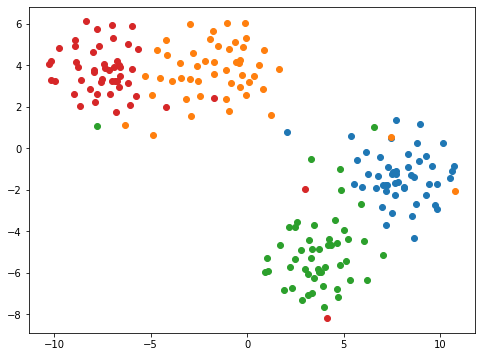

In [91]:
plot_data(X, y).shape

In [104]:
outliers = []
for l in labels:
    xl = X[y==l]
    yl = y[y==l]
    ld = np.arange(200)[y==l]
    x1_outliers = ld[np.where(np.abs(stats.zscore(xl[:, 0])) > 3)[0]]
    x2_outliers = ld[np.where(np.abs(stats.zscore(xl[:, 1])) > 3)[0]]
    print(x1_outliers, x2_outliers)
    outliers.extend(x1_outliers.tolist())
    outliers.extend(x2_outliers.tolist())
outliers = list(set(outliers))
outliers

[165] []
[24 35] [24]
[86] [84 86]
[ 98 105] [98]


[98, 35, 165, 105, 84, 86, 24]

(193, 2)

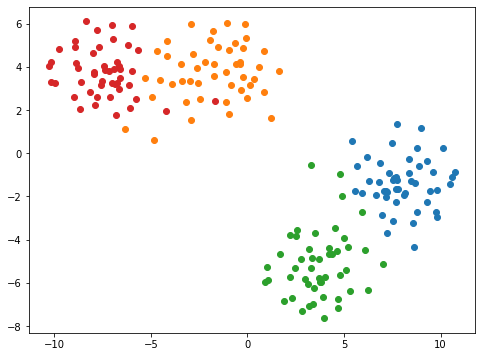

In [105]:
Xs = np.delete(X, outliers, 0)
ys = np.delete(y, outliers, 0)
plot_data(Xs, ys).shape

In [138]:
X_old, y_old = X, y
Xls = [X_old[y_old==l] for l in labels]
yls = [y_old[y_old==l] for l in labels]
np.random.seed(0)
sXls = []
syls = []
for xl, yl, l in zip(Xls, yls, labels):
    nl = 500-len(xl)
    sl = np.random.multivariate_normal(xl.mean(0), np.diag(xl.std(0)), size=nl)
    sXls.append(sl)
    syls.append([l]*nl)


In [139]:
X_new = np.vstack([Xs] + sXls)
y_new = np.hstack([ys] + syls)

(1993, 2)

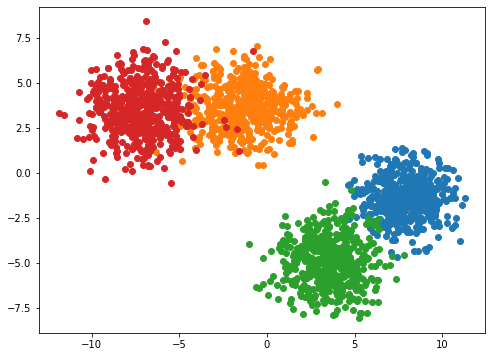

In [140]:
plot_data(X_new, y_new).shape